<a href="https://colab.research.google.com/github/limeng1011/policefatalcaseanalysis/blob/main/FatalForce042822.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 7.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
#pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f'The DataFrame df_hh_income has {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns.')
print(f'The DataFrame df_pct_poverty has {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns.')
print(f'The DataFrame df_pct_completed_hs has {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns.')
print(f'The DataFrame df_share_race_city has {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns.')
print(f'The DataFrame df_fatalities has {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns.')

The DataFrame df_hh_income has 29322 rows and 3 columns.
The DataFrame df_pct_poverty has 29329 rows and 3 columns.
The DataFrame df_pct_completed_hs has 29329 rows and 3 columns.
The DataFrame df_share_race_city has 29268 rows and 7 columns.
The DataFrame df_fatalities has 2535 rows and 14 columns.


In [ ]:
print(f'The column names of df_hh_income are {df_hh_income.columns}.')
print(f'The column names of df_pct_poverty are {df_pct_poverty.columns}.')
print(f'The column names of df_pct_completed_hs are {df_pct_completed_hs.columns}.')
print(f'The column names of df_share_race_city are {df_share_race_city.columns}.')
print(f'The column names of df_fatalities are {df_fatalities.columns}.')

The column names of df_hh_income are Index(['Geographic Area', 'City', 'Median Income'], dtype='object').
The column names of df_pct_poverty are Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object').
The column names of df_pct_completed_hs are Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object').
The column names of df_share_race_city are Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object').
The column names of df_fatalities are Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object').


In [ ]:
print(f'Are there NaN values in df_hh_income? {df_hh_income.isna().values.any()}.')
print(f'Are there NaN values in df_pct_poverty? {df_pct_poverty.isna().values.any()}.')
print(f'Are there NaN values in df_pct_completed_hs? {df_pct_completed_hs.isna().values.any()}.')
print(f'Are there NaN values in df_share_race_city? {df_share_race_city.isna().values.any()}.')
print(f'Are there NaN values in df_fatalities? {df_fatalities.isna().values.any()}.')

Are there NaN values in df_hh_income? True.
Are there NaN values in df_pct_poverty? False.
Are there NaN values in df_pct_completed_hs? False.
Are there NaN values in df_share_race_city? False.
Are there NaN values in df_fatalities? True.


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [ ]:
df_hh_income.dropna(axis=0, inplace=True)
print(f'Are there NaN values in df_hh_income? {df_hh_income.isna().values.any()}.')

Are there NaN values in df_hh_income? False.


In [ ]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [ ]:
df_fatalities.dropna(axis=0, inplace=True)

In [ ]:
print(f'Are there duplicated values in df_hh_income? {df_hh_income.duplicated().values.any()}.')
print(f'Are there duplicated values in df_pct_poverty? {df_pct_poverty.duplicated().values.any()}.')
print(f'Are there duplicated values in df_pct_completed_hs? {df_pct_completed_hs.duplicated().values.any()}.')
print(f'Are there duplicated values in df_share_race_city? {df_share_race_city.duplicated().values.any()}.')
print(f'Are there duplicated values in df_fatalities? {df_fatalities.duplicated().values.any()}.')

Are there duplicated values in df_hh_income? False.
Are there duplicated values in df_pct_poverty? False.
Are there duplicated values in df_pct_completed_hs? False.
Are there duplicated values in df_share_race_city? False.
Are there duplicated values in df_fatalities? False.


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate, errors='coerce')

In [ ]:
df_pct_poverty.isna().sum()

Geographic Area      0
City                 0
poverty_rate       201
dtype: int64

In [ ]:
df_pct_poverty.dropna(axis=0, inplace=True)

In [ ]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29128 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29128 non-null  object 
 1   City             29128 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 910.2+ KB


In [ ]:
#df_pct_poverty.info()
df_poverty_state = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate':pd.Series.mean})

In [ ]:
df_poverty_state.sort_values('poverty_rate', ascending=False, inplace=True)

In [ ]:
bar = px.bar(x=df_poverty_state['Geographic Area'], 
             y=df_poverty_state['poverty_rate'], 
             color=df_poverty_state['poverty_rate'],
             color_continuous_scale='Aggrnyl',
             title='Average Poverty Rate in Different State')
bar.update_layout(xaxis_title='State',
                  yaxis_title='Poverty Rate',
                  coloraxis_showscale=False)
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
state_completed_hs_pct = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs':pd.Series.mean})

In [ ]:
state_completed_hs_pct.sort_values('percent_completed_hs', ascending=False, inplace=True)
bar2 = px.bar(x=state_completed_hs_pct['Geographic Area'],
              y=state_completed_hs_pct['percent_completed_hs'],
              color=state_completed_hs_pct['percent_completed_hs'],
              color_continuous_scale='rainbow',
              title='Percentage of Completed High School in Different States')
bar2.update_layout(xaxis_title='State',
                   yaxis_title='Percentage of Completed High School',
                   coloraxis_showscale=False)

bar2.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
state_poverty_hs_completed = pd.DataFrame.merge(state_completed_hs_pct, df_poverty_state, on='Geographic Area')
state_poverty_hs_completed

,Geographic Area,percent_completed_hs,poverty_rate
0,MA,92.40,9.59
1,WY,92.10,9.89
2,HI,91.67,13.40
3,UT,91.62,11.98
4,CT,91.59,9.14
5,ME,91.43,16.89
6,NJ,90.85,8.19
7,NH,90.71,12.66
8,NY,90.61,11.67
9,MT,90.49,16.51


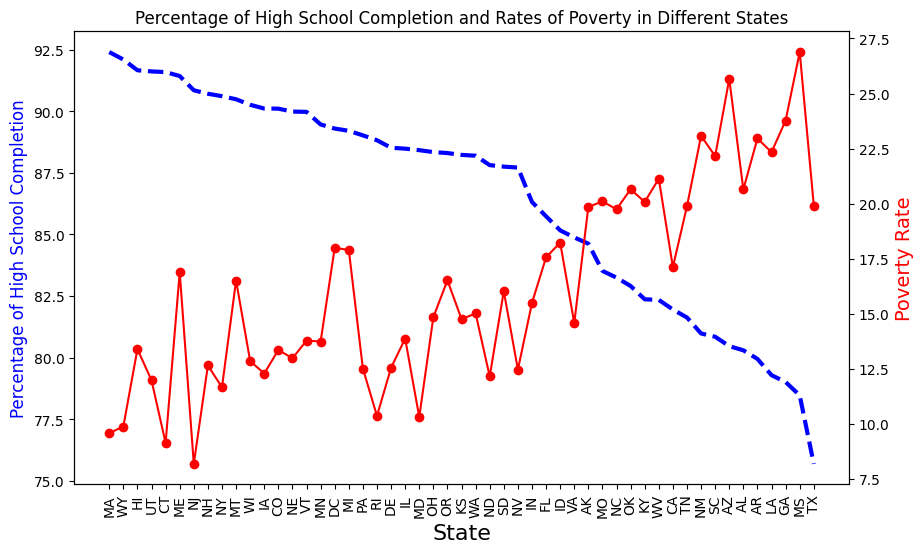

In [ ]:
plt.figure(figsize=(10,6), dpi=100)

plt.title('Percentage of High School Completion and Rates of Poverty in Different States')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=90)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_ylabel('Percentage of High School Completion', fontsize=12, color='blue')
ax2.set_ylabel('Poverty Rate', fontsize=14, color='red')
ax1.set_xlabel('State', fontsize=16)

ax1.plot(state_poverty_hs_completed['Geographic Area'], 
         state_poverty_hs_completed['percent_completed_hs'],
         color='blue',
         linestyle='--',
         linewidth=3)

ax2.plot(state_poverty_hs_completed['Geographic Area'], 
         state_poverty_hs_completed['poverty_rate'],
         color='red',
         marker='o')


plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

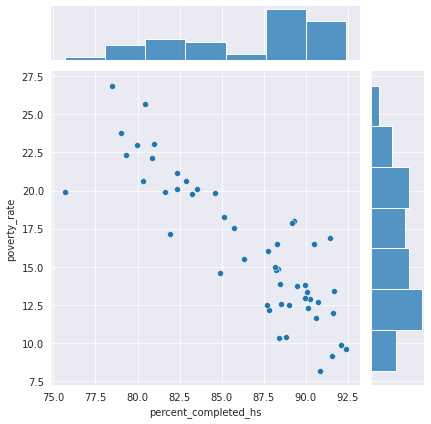

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x = state_poverty_hs_completed['percent_completed_hs'],
                y = state_poverty_hs_completed['poverty_rate'],
                kind = 'scatter')

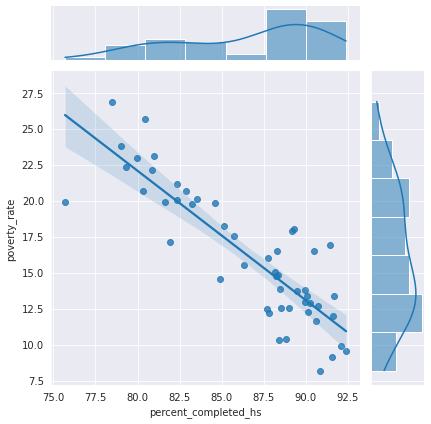

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=state_poverty_hs_completed['percent_completed_hs'],
                y=state_poverty_hs_completed['poverty_rate'],
                kind='reg',
                )

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

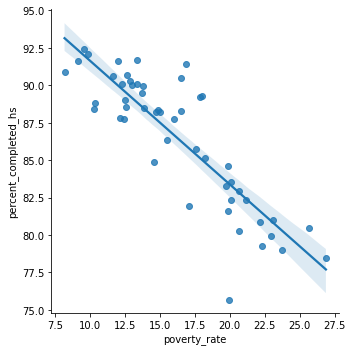

In [ ]:
sns.lmplot(x = 'poverty_rate',
           y = 'percent_completed_hs',
           data = state_poverty_hs_completed)          

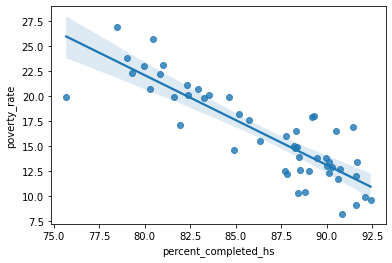

In [ ]:
sns.regplot(x = state_poverty_hs_completed['percent_completed_hs'],
            y = state_poverty_hs_completed['poverty_rate'])

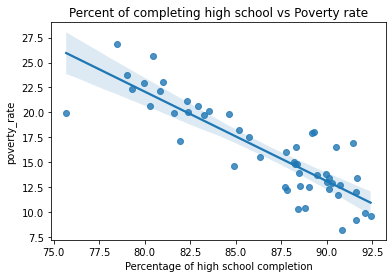

In [ ]:
sns.regplot(x='percent_completed_hs',
           y='poverty_rate',
           data=state_poverty_hs_completed)
plt.title('Percent of completing high school vs Poverty rate')
plt.xlabel('Percentage of high school completion')
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
#df_share_race_city = pd.read_csv('Share_of_Race_By_city.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_share_race_city.isna().values.any()
df_share_race_city.duplicated().values.any()

False

In [ ]:
for col in df_share_race_city.columns[2:]:
  df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

In [ ]:
df_share_race_city['total'] = df_share_race_city['share_asian'] + df_share_race_city['share_black'] + df_share_race_city['share_hispanic'] + df_share_race_city['share_native_american'] + df_share_race_city['share_white']

In [ ]:
df_share_race_city[df_share_race_city['share_asian'].isna()]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,total
630,AK,Chisana CDP,NaN,NaN,NaN,NaN,NaN,NaN
678,AK,Flat CDP,NaN,NaN,NaN,NaN,NaN,NaN
777,AK,Mertarvik CDP,NaN,NaN,NaN,NaN,NaN,NaN
1946,CA,Almanor CDP,NaN,NaN,NaN,NaN,NaN,NaN
2134,CA,Caribou CDP,NaN,NaN,NaN,NaN,NaN,NaN
2160,CA,Cedar Slope CDP,NaN,NaN,NaN,NaN,NaN,NaN
3194,CA,Silver City CDP,NaN,NaN,NaN,NaN,NaN,NaN
3248,CA,Sugarloaf Mountain Park CDP,NaN,NaN,NaN,NaN,NaN,NaN
3331,CA,University of California Merced CDP,NaN,NaN,NaN,NaN,NaN,NaN
3345,CA,Valley Wells CDP,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_share_race_city.dropna(axis=0, inplace=True)

In [ ]:
df_share_race_city.sort_values('total')

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,total
27564,WA,Laurier CDP,0.00,0.00,0.00,0.00,0.00,0.00
5811,HI,Waimanalo Beach CDP,9.20,0.20,0.10,4.20,7.60,21.30
5768,HI,Nanakuli CDP,4.80,0.80,0.20,9.20,11.80,26.80
5740,HI,Kualapuu CDP,8.40,0.30,0.00,13.80,6.50,29.00
5794,HI,Ualapu'e CDP,20.90,0.00,0.90,3.30,8.50,33.60
...,...,...,...,...,...,...,...,...
25868,TX,Sammy Martinez CDP,100.00,0.00,0.00,0.00,100.00,200.00
25261,TX,La Chuparosa CDP,100.00,0.00,0.00,0.00,100.00,200.00
24977,TX,Flor del Rio CDP,100.00,0.00,0.00,0.00,100.00,200.00
24668,TX,Buena Vista CDP,100.00,0.00,0.00,0.00,100.00,200.00


In [ ]:
df_share_race_city.drop(index=27564, inplace=True)

In [ ]:
df_share_race_city.sort_values('total')

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,total
5811,HI,Waimanalo Beach CDP,9.20,0.20,0.10,4.20,7.60,21.30
5768,HI,Nanakuli CDP,4.80,0.80,0.20,9.20,11.80,26.80
5740,HI,Kualapuu CDP,8.40,0.30,0.00,13.80,6.50,29.00
5794,HI,Ualapu'e CDP,20.90,0.00,0.90,3.30,8.50,33.60
5696,HI,Hauula CDP,18.80,0.50,0.20,6.10,8.50,34.10
...,...,...,...,...,...,...,...,...
25398,TX,Los Altos CDP,100.00,0.00,0.00,0.00,100.00,200.00
25399,TX,Los Alvarez CDP,100.00,0.00,0.00,0.00,100.00,200.00
25407,TX,Los Ebanos CDP (Starr County),100.00,0.00,0.00,0.00,100.00,200.00
24925,TX,El Mesquite CDP,100.00,0.00,0.00,0.00,100.00,200.00


In [ ]:
state_racial_makeup = df_share_race_city.groupby('Geographic area', as_index=False).agg({'share_white': pd.Series.sum,
                                                                                         'share_black': pd.Series.sum,
                                                                                         'share_native_american': pd.Series.sum,
                                                                                         'share_asian': pd.Series.sum,
                                                                                         'share_hispanic': pd.Series.sum,
                                                                                         'total': pd.Series.sum})
#state_racial_makeup['pct_asian'] = state_racial_makeup['share_asian']/state_racial_makeup['total']

In [ ]:
state_racial_makeup['pct_asian'] = state_racial_makeup['share_asian']/state_racial_makeup['total']
state_racial_makeup['pct_black'] = state_racial_makeup['share_black']/state_racial_makeup['total']
state_racial_makeup['pct_native_american'] = state_racial_makeup['share_native_american']/state_racial_makeup['total']
state_racial_makeup['pct_hispanic'] = state_racial_makeup['share_hispanic']/state_racial_makeup['total']
state_racial_makeup['pct_white'] = state_racial_makeup['share_white']/state_racial_makeup['total']

In [ ]:
state_racial_makeup.sort_values('pct_white', ascending=False, inplace=True)

In [ ]:
#plt.figure(figsize=(12,6), dpi=200)
bar3 = px.bar(state_racial_makeup,
              x = 'Geographic area',
              y = ['pct_asian', 'pct_black', 'pct_native_american', 'pct_hispanic', 'pct_white'],
              )
bar3.show()

<Figure size 2400x1200 with 0 Axes>

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
killed_race_makeup = df_fatalities['race'].value_counts()

In [ ]:
px.pie(values = killed_race_makeup.values,
       names = killed_race_makeup.index,
       hole = 0.5)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
df_fatalities_gender = df_fatalities['gender'].value_counts()
df_fatalities_gender

M    2160
F      94
Name: gender, dtype: int64

In [ ]:
bar4 = px.bar(x = df_fatalities_gender.index,
              y = df_fatalities_gender.values,
              color = df_fatalities_gender.values)
bar4.show()

In [ ]:
pie2 = px.pie(df_fatalities_gender,
              names = df_fatalities_gender.index,
              values = df_fatalities_gender.values,
              hole = 0.5)
pie2.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
box = px.box(df_fatalities, 
             y='age', 
             color='gender',
             )
box.show()

In [ ]:
#px.box(df_fatalities, y='manner_of_death')
#df_fatalities['manner_of_death'].value_counts()
manner_death_gender = df_fatalities.groupby(['manner_of_death','gender'], as_index=False).agg({'id':pd.Series.count})
manner_death_gender

,manner_of_death,gender,id
0,shot,F,89
1,shot,M,2011
2,shot and Tasered,F,5
3,shot and Tasered,M,149


In [ ]:
bar5 = px.bar(manner_death_gender,
              x = 'manner_of_death',
              y = 'id',
              color = 'gender')
bar5.show()

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,0,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,0,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,0,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
df_fatalities['armed'].value_counts()

gun            1247
knife           324
unarmed         165
vehicle         158
toy weapon      102
               ... 
chain saw         1
garden tool       1
pole              1
pick-axe          1
pen               1
Name: armed, Length: 67, dtype: int64

In [ ]:
pct_armed = len(df_fatalities[df_fatalities['armed']!='unarmed'])/len(df_fatalities)
pct_armed

0.9267968056787933

In [ ]:
killed_armed = df_fatalities[df_fatalities['armed']!='unarmed']
arm_type = killed_armed['armed'].value_counts()

In [ ]:
bar6 = px.bar(x = arm_type.index,
              y = arm_type.values,
              color = arm_type.values,
              log_y = True)
bar6.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
len(df_fatalities[df_fatalities['age'] < 25])/len(df_fatalities)

0.18722271517302574

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

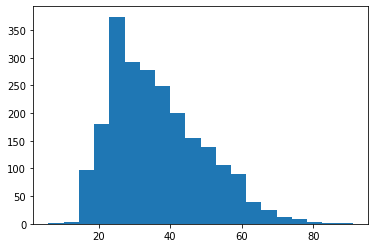

In [ ]:
plt.hist(df_fatalities['age'], bins=20)
plt.show()

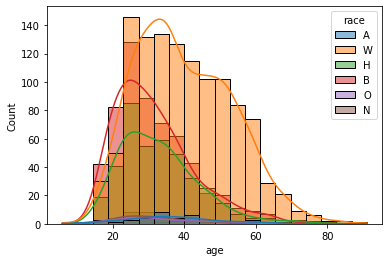

In [ ]:
sns.histplot(data=df_fatalities, 
             x='age',
             bins=20,
             kde=True,
             hue='race',
             )

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
killed_race_makeup.columns = ['number_of_killed']
killed_race_makeup

,number_of_killed
W,1168
B,592
H,401
A,36
N,29
O,28


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df_fatalities['signs_of_mental_illness'].value_counts()

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
df_fatalities['city_state'] = df_fatalities['city'] + ' ' + df_fatalities['state']
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,city_state
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Shelton WA
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,Aloha OR
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Wichita KS
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,San Francisco CA
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Evans CO


In [ ]:
killing_by_city = df_fatalities.groupby('city_state', as_index=False).agg({'id': pd.Series.count})

In [ ]:
killing_top10_city = killing_by_city.sort_values('id', ascending=False)[:10]

In [ ]:
killing_top10_city

,city_state,id
722,Los Angeles CA,35
972,Phoenix AZ,28
566,Houston TX,23
232,Chicago IL,22
681,Las Vegas NV,17
67,Austin TX,16
1087,San Antonio TX,15
278,Columbus OH,14
585,Indianapolis IN,14
1186,St. Louis MO,14


In [ ]:
df_fatalities[df_fatalities['city']=='Baltimore']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,city_state
57,107,Darin Hutchins,24/01/15,shot,knife,26.00,M,B,Baltimore,MD,True,other,Not fleeing,False,Baltimore MD
854,1000,Ryan Quinn Martin,11/11/15,shot,gun,32.00,M,B,Baltimore,MD,False,attack,Not fleeing,False,Baltimore MD
1247,1424,Kimani Johnson,31/03/16,shot,gun,18.00,M,B,Baltimore,MD,False,attack,Not fleeing,False,Baltimore MD
1248,1425,Matthew Vincent Wood,31/03/16,shot,gun,43.00,M,B,Baltimore,MD,False,attack,Not fleeing,False,Baltimore MD
1521,1710,Dayten Ernest Harper,14/07/16,shot,gun,33.00,M,B,Baltimore,MD,False,attack,Not fleeing,False,Baltimore MD
1908,2126,Lavar Montray Douglas,13/12/16,shot,gun,18.00,M,B,Baltimore,MD,False,attack,Not fleeing,False,Baltimore MD
2069,2310,Curtis Jamal Deal,07/02/17,shot,gun,18.00,M,B,Baltimore,MD,False,other,Other,True,Baltimore MD
2202,2452,Reno Joseph Owens,24/03/17,shot,knife,39.00,M,B,Baltimore,MD,True,other,Not fleeing,True,Baltimore MD


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
top10_city_list = []
for index, value in killing_top10_city['city_state'].iteritems():
  top10_city_list.append(value)
top10_city_list

['Los Angeles CA',
 'Phoenix AZ',
 'Houston TX',
 'Chicago IL',
 'Las Vegas NV',
 'Austin TX',
 'San Antonio TX',
 'Columbus OH',
 'Indianapolis IN',
 'St. Louis MO']

In [ ]:
top10_city_race = df_fatalities[df_fatalities['city_state'].isin(top10_city_list)]

In [ ]:
top10_city_racial = top10_city_race.groupby(['city_state', 'race'], as_index=False).agg({'id':pd.Series.count})

In [ ]:
killing_top10_race = pd.merge(killing_top10_city, top10_city_racial, on='city_state')

In [ ]:
killing_top10_race.columns = ['city_state', 'total_number', 'race', 'number']

In [ ]:
killing_top10_race['pct'] = killing_top10_race['number']/killing_top10_race['total_number']

In [ ]:
killing_top10_race.sort_values('total_number', ascending=False, inplace=True)

In [ ]:
bar7 = px.bar(killing_top10_race,
              x = 'city_state',
              y = 'pct',
              color = 'race',
              )
bar7.show()

In [ ]:
bar8 = px.bar(killing_top10_race,
              x = 'city_state',
              y = 'number',
              color = 'race')
bar8.show()


In [ ]:
killing_top10_race

,city_state,total_number,race,number,pct
0,Los Angeles CA,35,A,1,0.03
2,Los Angeles CA,35,H,18,0.51
3,Los Angeles CA,35,W,6,0.17
1,Los Angeles CA,35,B,10,0.29
4,Phoenix AZ,28,B,2,0.07
5,Phoenix AZ,28,H,11,0.39
6,Phoenix AZ,28,N,3,0.11
7,Phoenix AZ,28,W,12,0.43
8,Houston TX,23,A,1,0.04
9,Houston TX,23,B,14,0.61


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
killing_by_state = df_fatalities['state'].value_counts()

In [ ]:
killing_by_state

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
SC     41
IN     40
KY     40
MD     36
MI     36
NV     34
OR     32
MN     31
NJ     30
KS     24
UT     22
MS     22
MA     22
WV     21
AR     20
AK     14
NE     14
ID     14
IA     12
MT     11
HI     11
DC     11
ME     10
SD      9
DE      8
CT      7
NH      7
WY      7
ND      4
VT      3
RI      2
Name: state, dtype: int64

In [ ]:
us_map = px.choropleth(killing_by_state,
                       locations = killing_by_state.index,
                       locationmode = 'USA-states',
                       color = killing_by_state.values,
                       color_continuous_scale = px.colors.sequential.Rainbow)
us_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

In [ ]:
killing_by_time = df_fatalities.groupby('month_year', as_index=False).agg({'id':pd.Series.count})

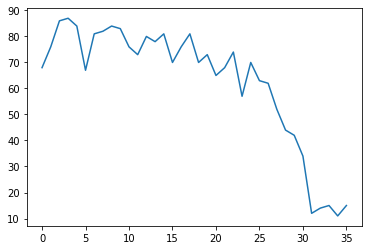

In [ ]:
plt.plot(
         killing_by_time['id'],
         )

<Figure size 1000x800 with 0 Axes>

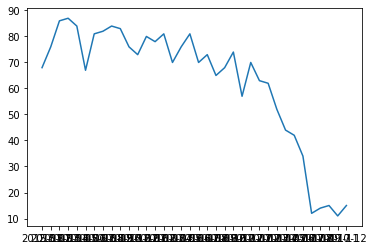

<Figure size 1000x800 with 0 Axes>

In [ ]:
plt.figure(figsize = (10,8), dpi=100)
x = np.arange(0,len(killing_by_time),1)
fig, ax = plt.subplots(1,1)
plt.figure(figsize = (10,8), dpi=100)
ax.plot(x,killing_by_time['id'])
ax.set_xticks(x)
ax.set_xticklabels(killing_by_time['month_year'])
plt.show()

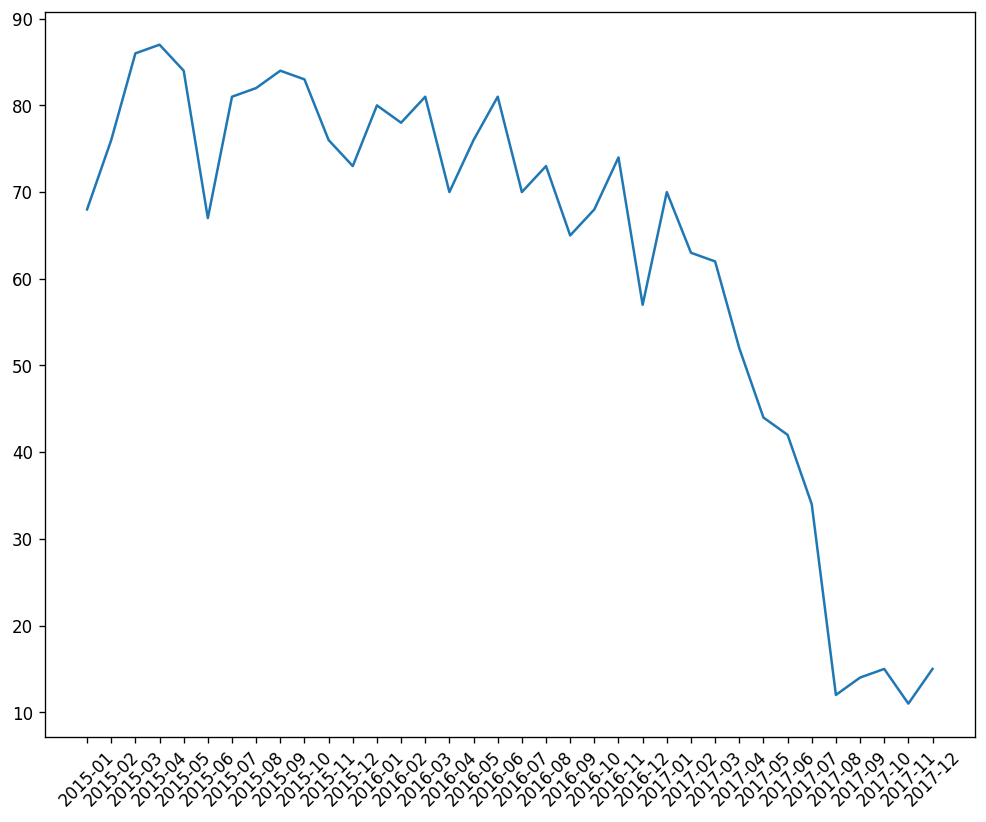

In [ ]:
plt.figure(figsize=(10,8), dpi=120)
x = np.arange(0,len(killing_by_time),1)
plt.plot(x, killing_by_time['id']
         )
plt.xticks(x, labels=killing_by_time['month_year'], rotation=45)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).